In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def load_data(folder_name, training_run):
    performance_over_time = np.loadtxt(folder_name+'/training_run_'+str(training_run)+'_performance.csv', delimiter=',')
    test_sets_used = np.loadtxt(folder_name+'/training_run_'+str(training_run)+'_test_sets_used.csv', delimiter=',')
    mutation_ranges = np.loadtxt(folder_name+'/training_run_'+str(training_run)+'_mutation_ranges.csv', delimiter=',')
    best_weights = np.loadtxt(folder_name+'/training_run_'+str(training_run)+'_best_weights.csv', delimiter=',')
    config_array = np.load(folder_name+'/training_run_'+str(training_run)+'_config.npy', allow_pickle=True)
    config = config_array.item()

    return performance_over_time, test_sets_used, mutation_ranges, best_weights, config


def array_to_dict(array):
    print(array)
    return {key: value for key, value in array}


In [3]:
class run:
    def __init__(self,performance_over_time, test_sets_used, mutation_ranges, best_weights, config):
        self.performances = performance_over_time
        self.test_sets = test_sets_used
        self.mutation_ranges = mutation_ranges
        self.best_weights = best_weights
        self.config = config



In [4]:
runs = []

training_runs = 30
for training_run in range(training_runs):
    try:
        folder_name = 'run_' + str(training_run)
        performance_over_time, test_sets_used, mutation_ranges, best_weights, config = load_data(folder_name, training_run)
        runs.append(run(performance_over_time, test_sets_used, mutation_ranges, best_weights, config))
    except:
        pass

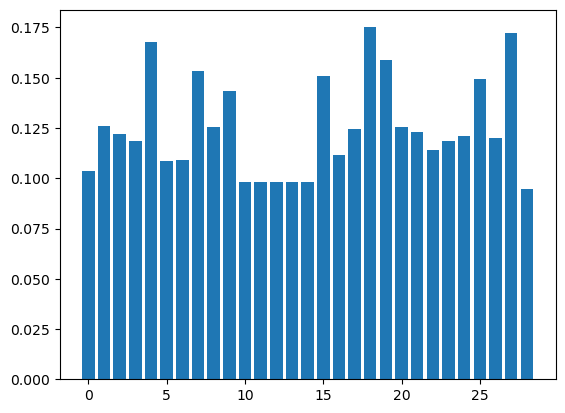

<function matplotlib.pyplot.show(close=None, block=None)>

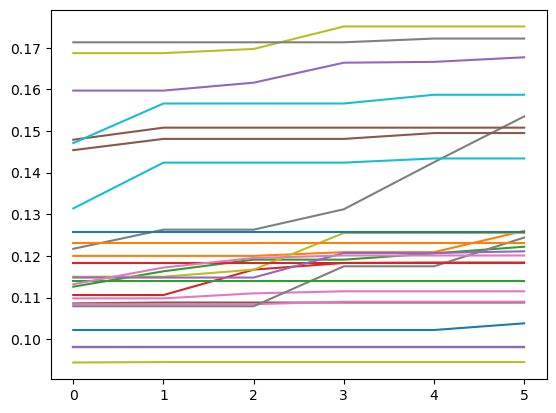

In [5]:


#GRAPHING PERFORMANCES
#best performance of each run
best_performances = []
for run in runs:
    best_performances.append(run.performances.max())

plt.bar( range(len(best_performances)), best_performances)
plt.show()

#performance curves of each run
performance_curves = []
for run in runs:
    performance_curves.append(run.performances.max(axis = 1))

for curve in performance_curves:
    plt.plot(curve)
plt.show
    


In [6]:
#grouping by moddified parameter:

def get_modified_param_string(modified_config):
    default_config = {
        "neuron_count": 1000,
        "connection_probability_dropoff": 3.0,
        "hidden_neuron_connections": 6,
        "inference_steps": 8,
        "activation_function": "leaky_relu",
        "n_survivors": 3,
    }

    modified_param = "activation_function"
    for i in default_config.keys():
        if modified_config[i] != default_config[i]:
            print(i, modified_config[i], default_config[i])
            modified_param = i
   


    default_value = default_config[modified_param]
    modified_value = modified_config[modified_param]

    if isinstance(default_value, str):
        change = f"{default_value} -> {modified_value}"
    else:
        change_amount = modified_value - default_value
        change = f"{default_value} -> {modified_value} (Change: {change_amount})"

    return modified_param, change




param_groups = {}
for i in range(len(runs)):
    config_dict = runs[i].config
    mod_param, change = get_modified_param_string( config_dict)
    if mod_param in param_groups.keys():
        param_groups[mod_param].append(runs[i])
    else:
        param_groups[mod_param] = [runs[i]]


neuron_count 243 1000
neuron_count 448 1000
neuron_count 733 1000
neuron_count 1105 1000
neuron_count 1573 1000
connection_probability_dropoff 1.0 3.0
connection_probability_dropoff 1.75 3.0
connection_probability_dropoff 2.5 3.0
connection_probability_dropoff 3.25 3.0
connection_probability_dropoff 4.0 3.0
hidden_neuron_connections 3 6
hidden_neuron_connections 7 6
hidden_neuron_connections 11 6
hidden_neuron_connections 15 6
hidden_neuron_connections 20 6
inference_steps 6 8
inference_steps 9 8
inference_steps 13 8
inference_steps 16 8
inference_steps 20 8
n_survivors 4 3
n_survivors 8 3
n_survivors 11 3
n_survivors 15 3
activation_function relu leaky_relu
activation_function relu leaky_relu
activation_function relu leaky_relu


In [7]:
for i in param_groups.keys():
    print("changed:",i,"length:",len(param_groups[i]))
    

changed: neuron_count length: 5
changed: connection_probability_dropoff length: 5
changed: hidden_neuron_connections length: 5
changed: inference_steps length: 5
changed: n_survivors length: 4
changed: activation_function length: 5


neuron_count


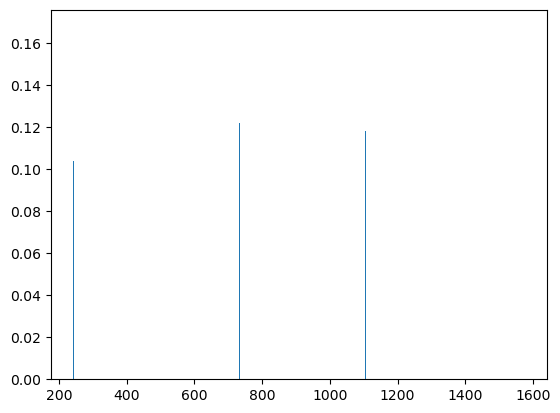

connection_probability_dropoff


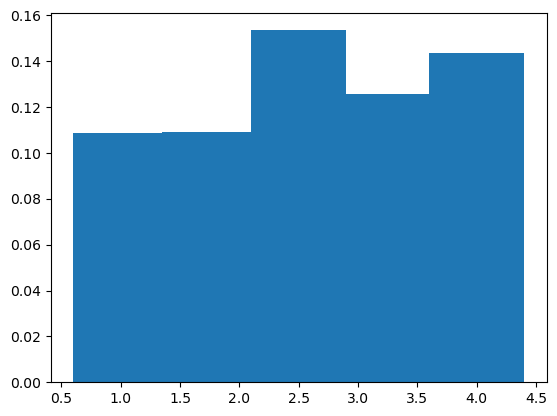

hidden_neuron_connections


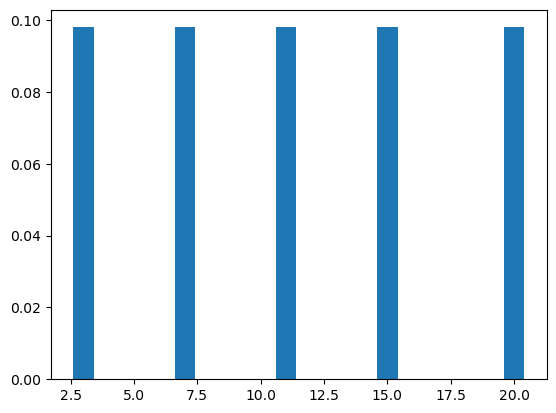

inference_steps


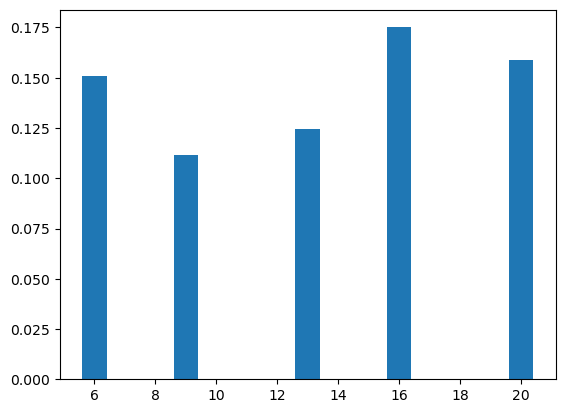

n_survivors


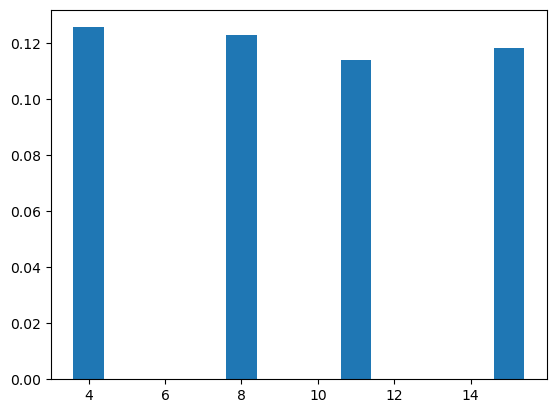

activation_function


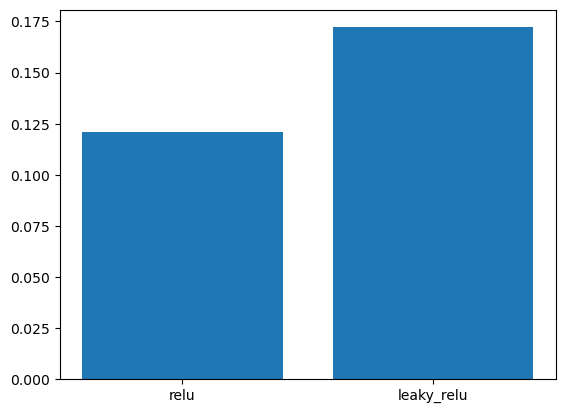

In [9]:
for key in param_groups.keys():
    print(key)
    best = []
    confs = []
    for run in param_groups[key]:
        best.append(run.performances.max())
        confs.append(run.config[key])
    plt.bar( confs, best)
    plt.show()

    